In [1]:
## import the librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
## inforation about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
##chcek the null values
dic=data.isnull().sum().to_dict()

In [8]:
nullcolum=[]
for i,j in dic.items():
    if j>=1:
        nullcolum.append(i)

In [9]:
nullcolum

['location', 'size', 'society', 'bath', 'balcony']

In [10]:
for column in nullcolum:
    print('feature',column)
    print(data[column].unique())
    print('**********')

feature location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
**********
feature size
['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']
**********
feature society
['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
**********
feature bath
[ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]
**********
feature balcony
[ 1.  3. nan  2.  0.]
**********


In [11]:
from statistics import mode

In [12]:
data['size'].mode()

0    2 BHK
Name: size, dtype: object

In [13]:
## in missing values column have object type we can use mode values
data['size']=data['size'].fillna(data['size'].mode()[0])

In [14]:
data['society']=data['society'].fillna(data['society'].mode()[0]) 

In [15]:
data['location']=data['location'].fillna(data['location'].mode()[0])   

In [16]:
data['society'].mode()[0]

'GrrvaGr'

## missing values in numeric type 
## we can check this numerica values has any outlier or not , if value have outlier we can use median otherwise we can use mean

<AxesSubplot:xlabel='bath'>

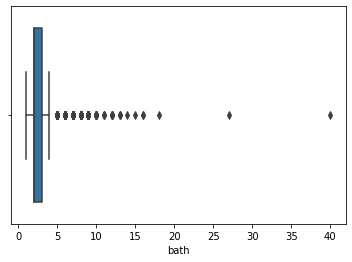

In [17]:
sns.boxplot(data['bath'])

<AxesSubplot:xlabel='balcony'>

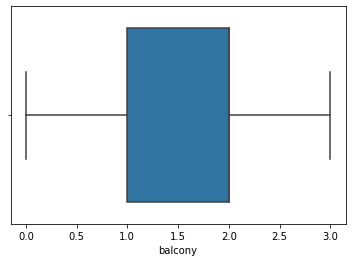

In [18]:
sns.boxplot(data['balcony'])

## conclusion
#### bath have some outliers so we can user median
#### balcony dont have any outliers we can use mean

In [19]:
data['bath']=data['bath'].fillna(data['bath'].median())
data['balcony']=data['balcony'].fillna(data['balcony'].mean())

In [20]:
## again check the null values
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [24]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [25]:
## Split the train and test data
from sklearn.model_selection import train_test_split

In [117]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [27]:
X_train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony
2870,Super built-up Area,Ready To Move,Gopalkrishna Nagar,2 BHK,MJarlPe,1165,2.0,2.0
6114,Super built-up Area,Ready To Move,NGR Layout,2 BHK,GrrvaGr,1019,2.0,1.0
5733,Super built-up Area,Ready To Move,AECS Layout,2 BHK,CMhamai,1123,2.0,2.0
9378,Super built-up Area,18-Apr,Basavangudi,2 BHK,GrrvaGr,1180,2.0,3.0
9301,Super built-up Area,Ready To Move,Green View Layout,2 BHK,Makeser,1108,2.0,1.0


In [36]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)

In [37]:
X_train.drop('index',axis=1)
X_test.drop('index',axis=1)

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Built-up Area,Ready To Move,Banjara Layout,2 Bedroom,GrrvaGr,1050,2.0,1.0
1,Super built-up Area,Ready To Move,Rajiv Nagar,3 BHK,PuoodSk,1690,3.0,1.0
2,Built-up Area,Ready To Move,Hebbal,2 BHK,GrrvaGr,1100,2.0,1.0
3,Plot Area,Ready To Move,Munnekollal,6 Bedroom,GrrvaGr,1200,4.0,2.0
4,Built-up Area,18-Apr,Choodasandra,4 Bedroom,LGifeew,2429,3.0,1.0
...,...,...,...,...,...,...,...,...
4391,Super built-up Area,Ready To Move,Electronic City Phase II,2 BHK,Coush W,1069,2.0,2.0
4392,Super built-up Area,Ready To Move,Kasavanhalli,3 BHK,HMwerCo,1476,3.0,0.0
4393,Super built-up Area,Ready To Move,Sultan Palaya,2 BHK,Vaaldak,1009,2.0,1.0
4394,Built-up Area,Ready To Move,HSR Layout,2 BHK,SruntFa,1126,2.0,1.0


In [38]:
X_train['availability'].unique()

array(['Ready To Move', '18-Apr', '17-Oct', '18-May', '17-Nov', '18-Mar',
       'Immediate Possession', '21-Mar', '18-Oct', '18-Jul', '21-Jun',
       '18-Feb', '21-May', '18-Aug', '20-Dec', '18-Dec', '21-Oct',
       '19-Dec', '19-Jul', '18-Jun', '22-May', '20-Aug', '21-Dec',
       '17-Jul', '17-Dec', '21-Feb', '19-Jan', '19-Apr', '19-Mar',
       '17-Sep', '19-Sep', '21-Jan', '17-Feb', '20-Jan', '19-Oct',
       '19-Jun', '18-Nov', '17-Apr', '21-Sep', '18-Jan', '18-Sep',
       '19-Feb', '22-Jan', '20-Jun', '19-May', '20-Sep', '19-Aug',
       '17-May', '16-Dec', '17-Jun', '22-Jun', '20-Oct', '19-Nov',
       '21-Jul', '17-Aug', '14-Jul', '20-May', '20-Jul', '16-Jul',
       '22-Dec', '17-Mar', '21-Aug', '15-Nov', '17-Jan', '16-Sep',
       '16-Mar', '21-Nov', '15-Jun', '20-Feb', '22-Mar', '20-Nov',
       '20-Mar', '16-Oct', '15-Dec', '20-Apr'], dtype=object)

In [39]:
X_train['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Carpet  Area',
       'Built-up  Area'], dtype=object)

In [40]:
X_train['size'].unique()

array(['2 BHK', '3 BHK', '6 Bedroom', '4 BHK', '3 Bedroom', '2 Bedroom',
       '4 Bedroom', '1 BHK', '5 Bedroom', '5 BHK', '1 Bedroom',
       '9 Bedroom', '1 RK', '7 Bedroom', '8 Bedroom', '6 BHK', '9 BHK',
       '7 BHK', '8 BHK', '16 BHK', '10 Bedroom', '13 BHK', '12 Bedroom',
       '10 BHK', '14 BHK', '11 BHK', '18 Bedroom'], dtype=object)

<AxesSubplot:>

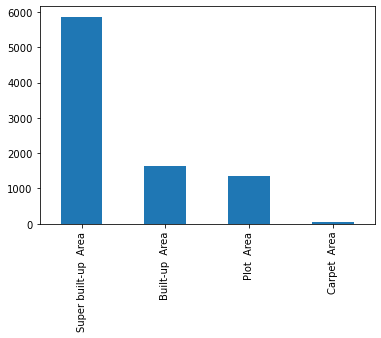

In [41]:
X_train['area_type'].value_counts().plot(kind='bar')

## change the availability field values

In [42]:
X_train['availability']=np.where(X_train['availability'].str.contains('-'),'Delay',X_train['availability'])
X_test['availability']=np.where(X_test['availability'].str.contains('-'),'Delay',X_test['availability'])

#### one hot encoding for areatype

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder=OneHotEncoder()

In [45]:
area_type_codeer_train=encoder.fit_transform(X_train[['area_type','availability']]).toarray()
area_type_codeer_test=encoder.fit_transform(X_test[['area_type','availability']]).toarray()

In [62]:
np.array( encoder.get_feature_names_out())

array(['area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'availability_Delay', 'availability_Immediate Possession',
       'availability_Ready To Move'], dtype=object)

In [46]:
area_type_codeer_df_train=pd.DataFrame(area_type_codeer_train,columns=encoder.get_feature_names_out())
area_type_codeer_df_test=pd.DataFrame(area_type_codeer_test,columns=encoder.get_feature_names_out())

In [55]:
area_type_codeer_df_train.head()

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Delay,availability_Immediate Possession,availability_Ready To Move
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [47]:
sizedata=[]
def sizecheck(value):
    if 'BHK' in value:
        sizedata.append([1,1,1])
    else:
        sizedata.append([1,0,0])          

In [50]:
sizedf=pd.DataFrame(sizedata,columns=['Bedroom','Hall','Kitchen'])

In [51]:
sizedf.head()

,Bedroom,Hall,Kitchen


In [56]:
X_train_copy=pd.concat([X_train, area_type_codeer_df_train], axis=1)
X_test_copy=pd.concat([X_test, area_type_codeer_df_test], axis=1)

In [57]:
X_train_copy.head()

,level_0,index,area_type,availability,location,size,society,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Delay,availability_Immediate Possession,availability_Ready To Move
0,0,2870,Super built-up Area,Ready To Move,Gopalkrishna Nagar,2 BHK,MJarlPe,1165,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,6114,Super built-up Area,Ready To Move,NGR Layout,2 BHK,GrrvaGr,1019,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,5733,Super built-up Area,Ready To Move,AECS Layout,2 BHK,CMhamai,1123,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,9378,Super built-up Area,Delay,Basavangudi,2 BHK,GrrvaGr,1180,2.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4,9301,Super built-up Area,Ready To Move,Green View Layout,2 BHK,Makeser,1108,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
X_test_copy.head()

,index,area_type,availability,location,size,society,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Delay,availability_Immediate Possession,availability_Ready To Move
0,8077,Built-up Area,Ready To Move,Banjara Layout,2 Bedroom,GrrvaGr,1050,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1602,Super built-up Area,Ready To Move,Rajiv Nagar,3 BHK,PuoodSk,1690,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,10498,Built-up Area,Ready To Move,Hebbal,2 BHK,GrrvaGr,1100,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3297,Plot Area,Ready To Move,Munnekollal,6 Bedroom,GrrvaGr,1200,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,8893,Built-up Area,Delay,Choodasandra,4 Bedroom,LGifeew,2429,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
## remove the column in both train and test
deletecolumns=['index','area_type','availability','location','size','society']

In [65]:
for col in deletecolumns:
    #X_train_copy.drop(col,axis=1,inplace=True)
    X_test_copy.drop(col,axis=1,inplace=True)

In [67]:
X_train_copy.head()
X_train_copy.drop('level_0',axis=1,inplace=True)

In [68]:
X_test_copy.head()

,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Delay,availability_Immediate Possession,availability_Ready To Move
0,1050,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1690,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1100,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1200,4.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2429,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8924 entries, 0 to 8923
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   total_sqft                         8924 non-null   object 
 1   bath                               8924 non-null   float64
 2   balcony                            8924 non-null   float64
 3   area_type_Built-up  Area           8924 non-null   float64
 4   area_type_Carpet  Area             8924 non-null   float64
 5   area_type_Plot  Area               8924 non-null   float64
 6   area_type_Super built-up  Area     8924 non-null   float64
 7   availability_Delay                 8924 non-null   float64
 8   availability_Immediate Possession  8924 non-null   float64
 9   availability_Ready To Move         8924 non-null   float64
dtypes: float64(9), object(1)
memory usage: 697.3+ KB


In [78]:
## supprt vector classifier

In [135]:
from sklearn.svm import SVR

In [136]:
svr=SVR(kernel='linear')

In [96]:
X_train_copy[X_train_copy['total_sqft'].str.contains('-')]

,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Delay,availability_Immediate Possession,availability_Ready To Move
13,1005.03 - 1252.49,3.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
40,1200 - 1800,2.0,1.584376,0.0,0.0,1.0,0.0,0.0,1.0,0.0
132,1430 - 1630,2.0,1.584376,0.0,0.0,0.0,1.0,0.0,0.0,1.0
152,540 - 565,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
308,2695 - 2940,2.0,1.584376,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8760,547.34 - 827.31,2.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8839,1750 - 2640,2.0,1.584376,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8840,1804 - 2273,3.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8875,1210 - 1477,3.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [97]:
X_test_copy[X_test_copy['total_sqft'].str.contains('-')]

,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Delay,availability_Immediate Possession,availability_Ready To Move
131,3630 - 3800,6.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
183,1255 - 1350,2.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
240,381 - 535,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
429,888 - 1290,2.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
552,1974 - 2171,2.0,1.584376,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4273,3010 - 3410,2.0,1.584376,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4293,1482 - 1846,2.0,1.584376,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4304,1400 - 1421,2.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4319,934 - 1437,2.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [99]:
X_train_copy['total_sqft']=X_train_copy['total_sqft'].str.split('-').str[0]

In [100]:
X_test_copy['total_sqft']=X_test_copy['total_sqft'].str.split('-').str[0]

In [103]:
y_train.unique()

array([ 75.  ,  45.9 ,  64.  , ...,  30.88, 244.  ,  71.13])

In [140]:
y_train=y_train.replace('24Guntha',y_train.median())

In [142]:
y_train

2870      75.0
6114      45.9
5733      64.0
9378     124.0
9301      48.0
         ...  
11964     99.0
5191     120.0
5390      48.5
860      125.0
7270      90.0
Name: price, Length: 8924, dtype: float64

In [138]:
y_test=y_test.replace('24Guntha',y_train.median())

In [143]:
y_test

8077      64.8
1602     125.0
10498     60.0
3297     110.0
8893     210.0
         ...  
292       45.0
2836      89.0
9743      65.0
5960      69.0
10280     70.0
Name: price, Length: 4396, dtype: float64

In [ ]:
## total_sqfthave 24Guntha values

In [ ]:
for i in X_train_copy.columns:
    check=X_train_copy[X_train_copy[i]=='24Guntha']
    print(check)

In [165]:
X_train_copy['total_sqft']=X_train_copy['total_sqft'].replace('24Guntha',1165)

In [168]:
X_train_copy['total_sqft'].unique()

array(['1165', '1019', '1123', ..., '3161', '1437', '1493'], dtype=object)

In [174]:
X_train_copy['total_sqft']

0       1165
1       1019
2       1123
3       1180
4       1108
        ... 
8919    1200
8920    1559
8921    1060
8922    1200
8923    1885
Name: total_sqft, Length: 8924, dtype: object

In [180]:
X_train_copy['total_sqft'].mode()

0    1200
Name: total_sqft, dtype: object

In [181]:
X_test_copy['total_sqft'].mode()

0    1200
Name: total_sqft, dtype: object

In [202]:
X_train_copy['total_sqft']=X_train_copy['total_sqft'].apply(numchec)

In [203]:
X_test_copy['total_sqft']=X_test_copy['total_sqft'].apply(numchec)

In [201]:
def numchec(value):
    if type(value)==int:
        return value
    else:
        return int(1200)

In [204]:
svr.fit(X_train_copy,y_train)

SVR(kernel='linear')

In [205]:
y_precict=svr.predict(X_test_copy)

In [209]:
from sklearn.metrics import r2_score

In [210]:
print(r2_score(y_test,y_precict))

0.1973512489411141
